In [11]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math

dataDir = "c:/Users/llave/Documents/CMS/data/electron_selection_failSelection_compressed/"

In [14]:
ids = []
noMatch = 0
nFiles = 0
genDRs = []
for file in os.listdir(dataDir):
    if("e_0p25"in file and ".npz" in file):
        
        # load images from file
        temp = np.load(dataDir+file)
        if(len(temp['infos'])>0): infos = temp['infos']
        
        for info in infos:
            genID = info[9]
            genDR = info[10]
            genDRs.append(genDR)
            if(abs(genDR)<0.1): ids.append(genID)
            else: noMatch+=1
                
        nFiles+=1
        if(nFiles%500==0): print(nFiles)
        if(nFiles==1000): break

500
1000


(array([6.934e+03, 6.090e+02, 1.820e+02, 5.900e+01, 3.900e+01, 2.600e+01,
        2.000e+01, 1.800e+01, 1.800e+01, 1.400e+01, 5.000e+00, 9.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 4.000e+00, 7.000e+00, 5.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        5.000e+00, 4.000e+00]),
 array([7.06988537e-07, 1.97797366e-03, 3.95524033e-03, 5.93250700e-03,
        7.90977367e-03, 9.88704033e-03, 1.18643070e-02, 1.38415737e-02,
        1.58188403e-02, 1.77961070e-02, 1.97733737e-02, 2.17506403e-02,
        2.37279070e-02, 2.57051737e-02, 2.76824404e-02, 2.96597070e-02,
        3.16369737e-02, 3.36142404e-02, 3.55915070e-02, 3.75687737e-02,
        3.954604

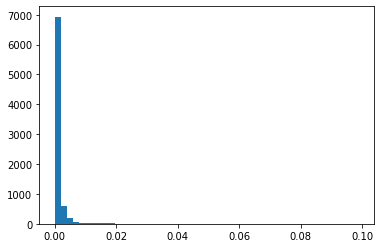

In [15]:
%matplotlib inline 
plt.hist(genDRs,bins=50)

In [16]:
print(len(ids),noMatch)

8045 0


In [48]:
ids = [int(x) for x in ids]
uniqueIDs = []
countIDs = []
for ID in ids:
    if ID not in uniqueIDs: 
        uniqueIDs.append(ID)
        countIDs.append(0)
    countIDs[uniqueIDs.index(ID)]+=1

In [49]:
print("ID:\t\tCount:")
for ID, count in zip(uniqueIDs, countIDs):
    print(str(ID)+"\t\t"+str(count))

ID:		Count:
-211		3869
211		3882
3312		9
-13		67
22		530
-16		354
16		329
-3312		8
13		61
-321		288
321		287
-14		25
3222		47
2212		40
-3222		12
2112		8
-2212		18
3112		21
-3112		14
-12		31
14		22
12		46
-2112		7
3322		2
3122		8
-3122		5
-3334		1
3334		1
-3322		1


(array([1.92068e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.01800e+03,
        2.49230e+04, 5.67570e+04, 1.45915e+05, 2.16285e+05, 2.67044e+05,
        3.16965e+05, 3.57216e+05, 3.77839e+05, 3.57666e+05, 3.28183e+05,
        2.98926e+05, 2.72055e+05, 2.50304e+05, 2.31237e+05, 2.12912e+05,
        1.84925e+05, 1.62186e+05, 1.43588e+05, 1.25919e+05, 1.10424e+05,
        9.70580e+04, 8.39850e+04, 7.16840e+04, 6.07040e+04, 5.09100e+04,
        4.11230e+04, 3.31020e+04, 2.52660e+04, 1.86780e+04, 1.30930e+04,
        8.68600e+03, 5.56100e+03, 3.68700e+03, 2.46600e+03, 1.74800e+03,
        1.24800e+03, 1.00000e+03, 7.17000e+02, 4.19000e+02, 2.94000e+02,
        1.87000e+02, 1.01000e+02, 4.10000e+01, 1.90000e+01, 6.00000e+00]),
 array([-1.        , -0.79300618, -0.58601235, -0.37901853, -0.17202471,
         0.03496912,  0.24196294,  0.44895677,  0.65595059,  0.86294441,
         1.06993824,  1.27693206,  1.48392588,  1.69091971,  1.89791353,
         2.10490735,  2.31190118,  2.518895  ,  2

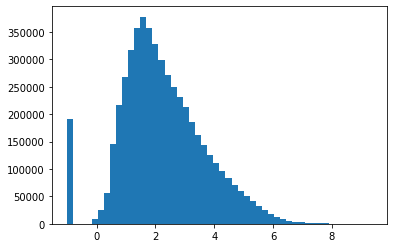

In [54]:
plt.hist(genDRs, bins=50)